#### **Import necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
#These will help you to see all columns in the data set
pd.set_option('display.max_columns', 500)

#### **Load the dataset**

In [3]:
cancer = load_breast_cancer()

In [4]:
# Convert the dataset into a pandas DataFrame
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

#### **Explore the dataset: EDA**

In [5]:
#Check the shape of the dataset: 
df.shape

(569, 31)

In [6]:
#View the first few rows: 
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
#Check for missing values: 
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [8]:
#Check the data types: 
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [9]:
#Check the summary statistics:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


#### **Data Visualization**

array([[<Axes: title={'center': 'mean radius'}>,
        <Axes: title={'center': 'mean texture'}>,
        <Axes: title={'center': 'mean perimeter'}>,
        <Axes: title={'center': 'mean area'}>,
        <Axes: title={'center': 'mean smoothness'}>,
        <Axes: title={'center': 'mean compactness'}>],
       [<Axes: title={'center': 'mean concavity'}>,
        <Axes: title={'center': 'mean concave points'}>,
        <Axes: title={'center': 'mean symmetry'}>,
        <Axes: title={'center': 'mean fractal dimension'}>,
        <Axes: title={'center': 'radius error'}>,
        <Axes: title={'center': 'texture error'}>],
       [<Axes: title={'center': 'perimeter error'}>,
        <Axes: title={'center': 'area error'}>,
        <Axes: title={'center': 'smoothness error'}>,
        <Axes: title={'center': 'compactness error'}>,
        <Axes: title={'center': 'concavity error'}>,
        <Axes: title={'center': 'concave points error'}>],
       [<Axes: title={'center': 'symmetry error'}>

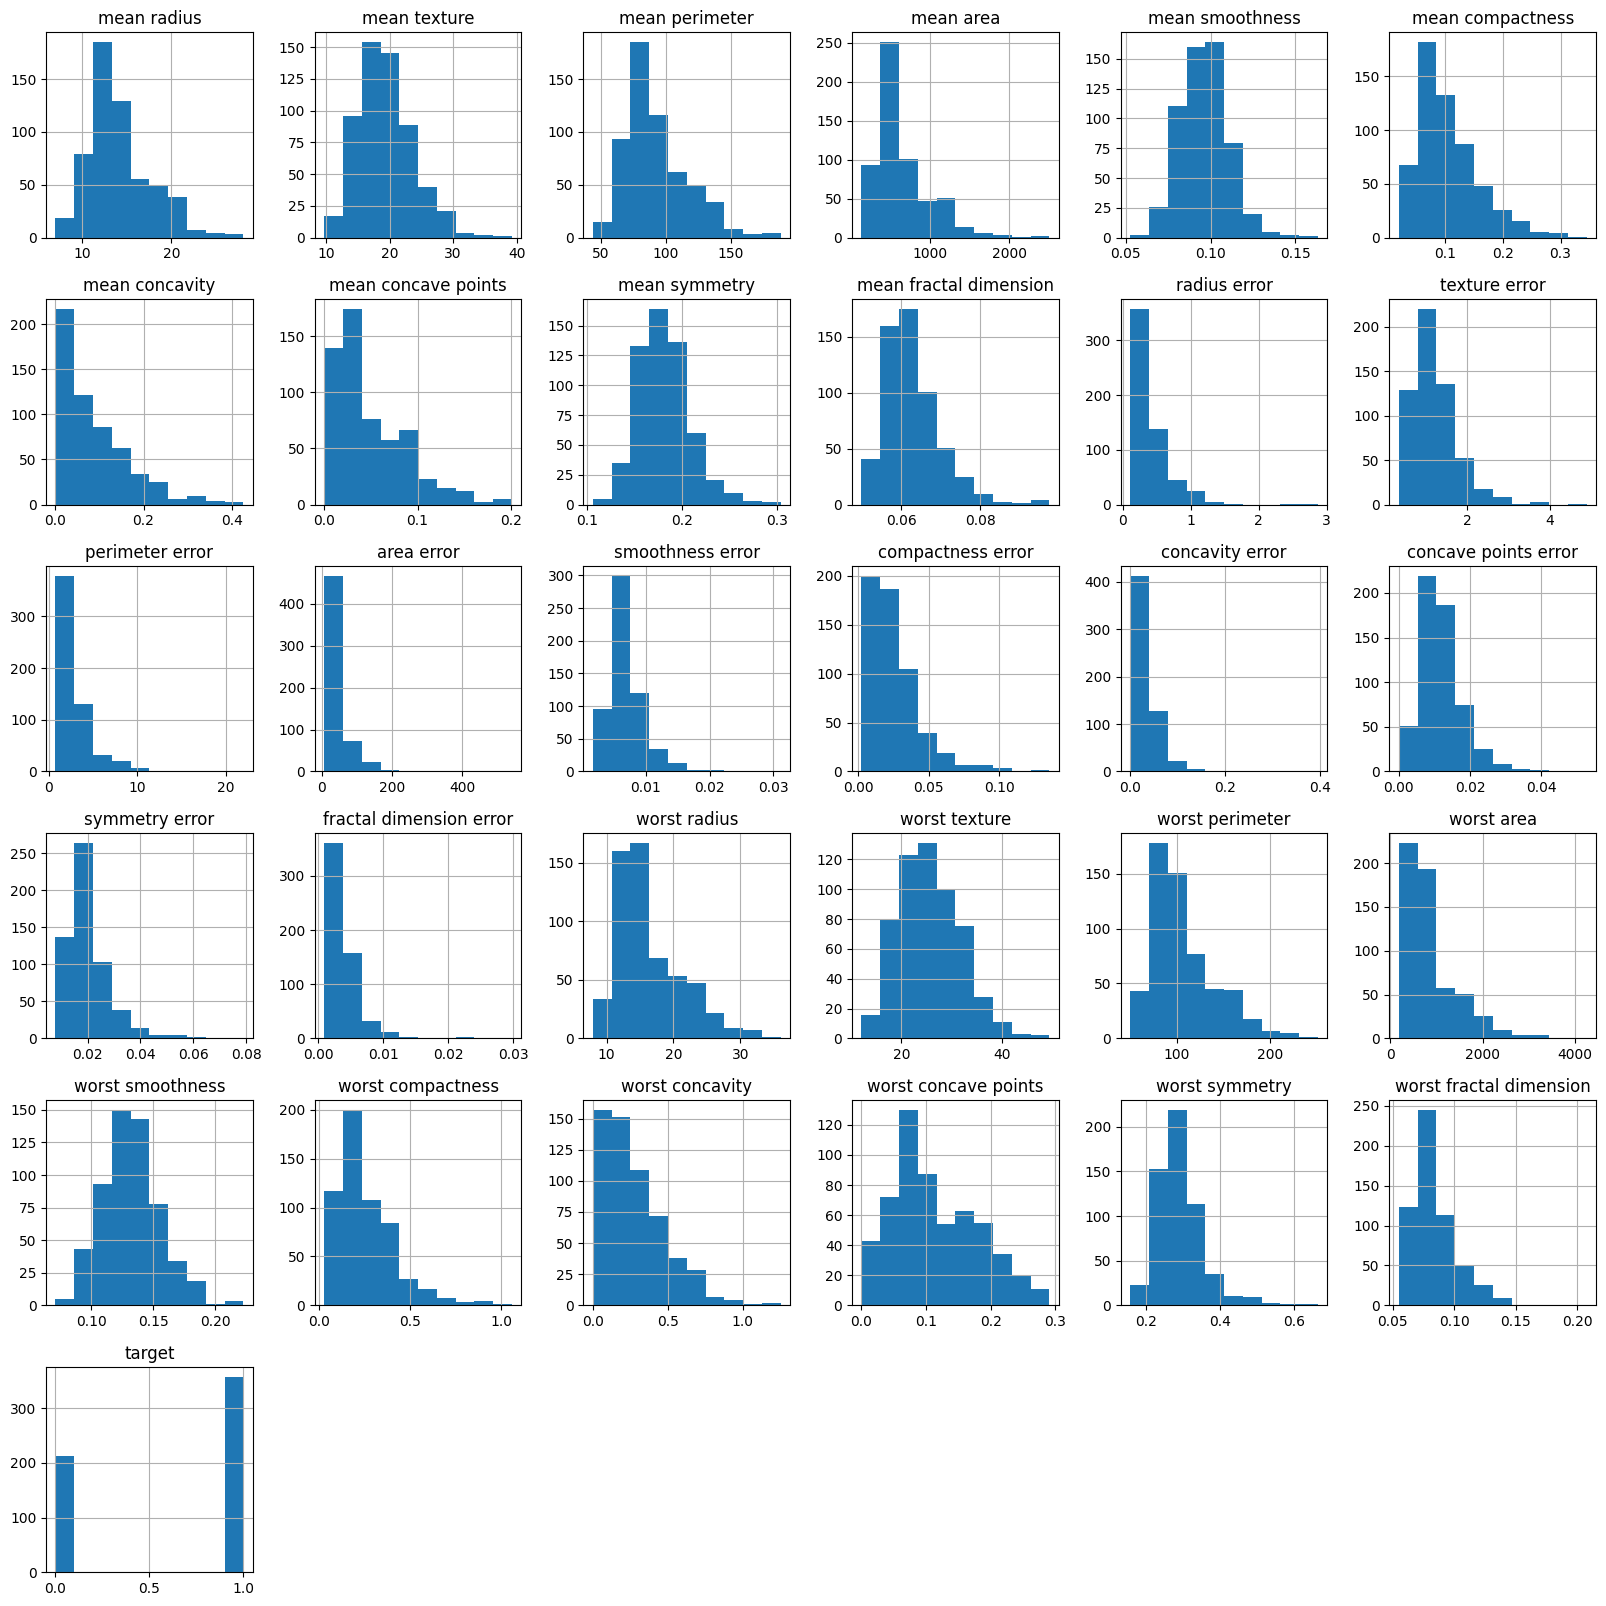

In [10]:
#Histograms for each feature: 
df.hist(figsize=(20,20))

<Axes: >

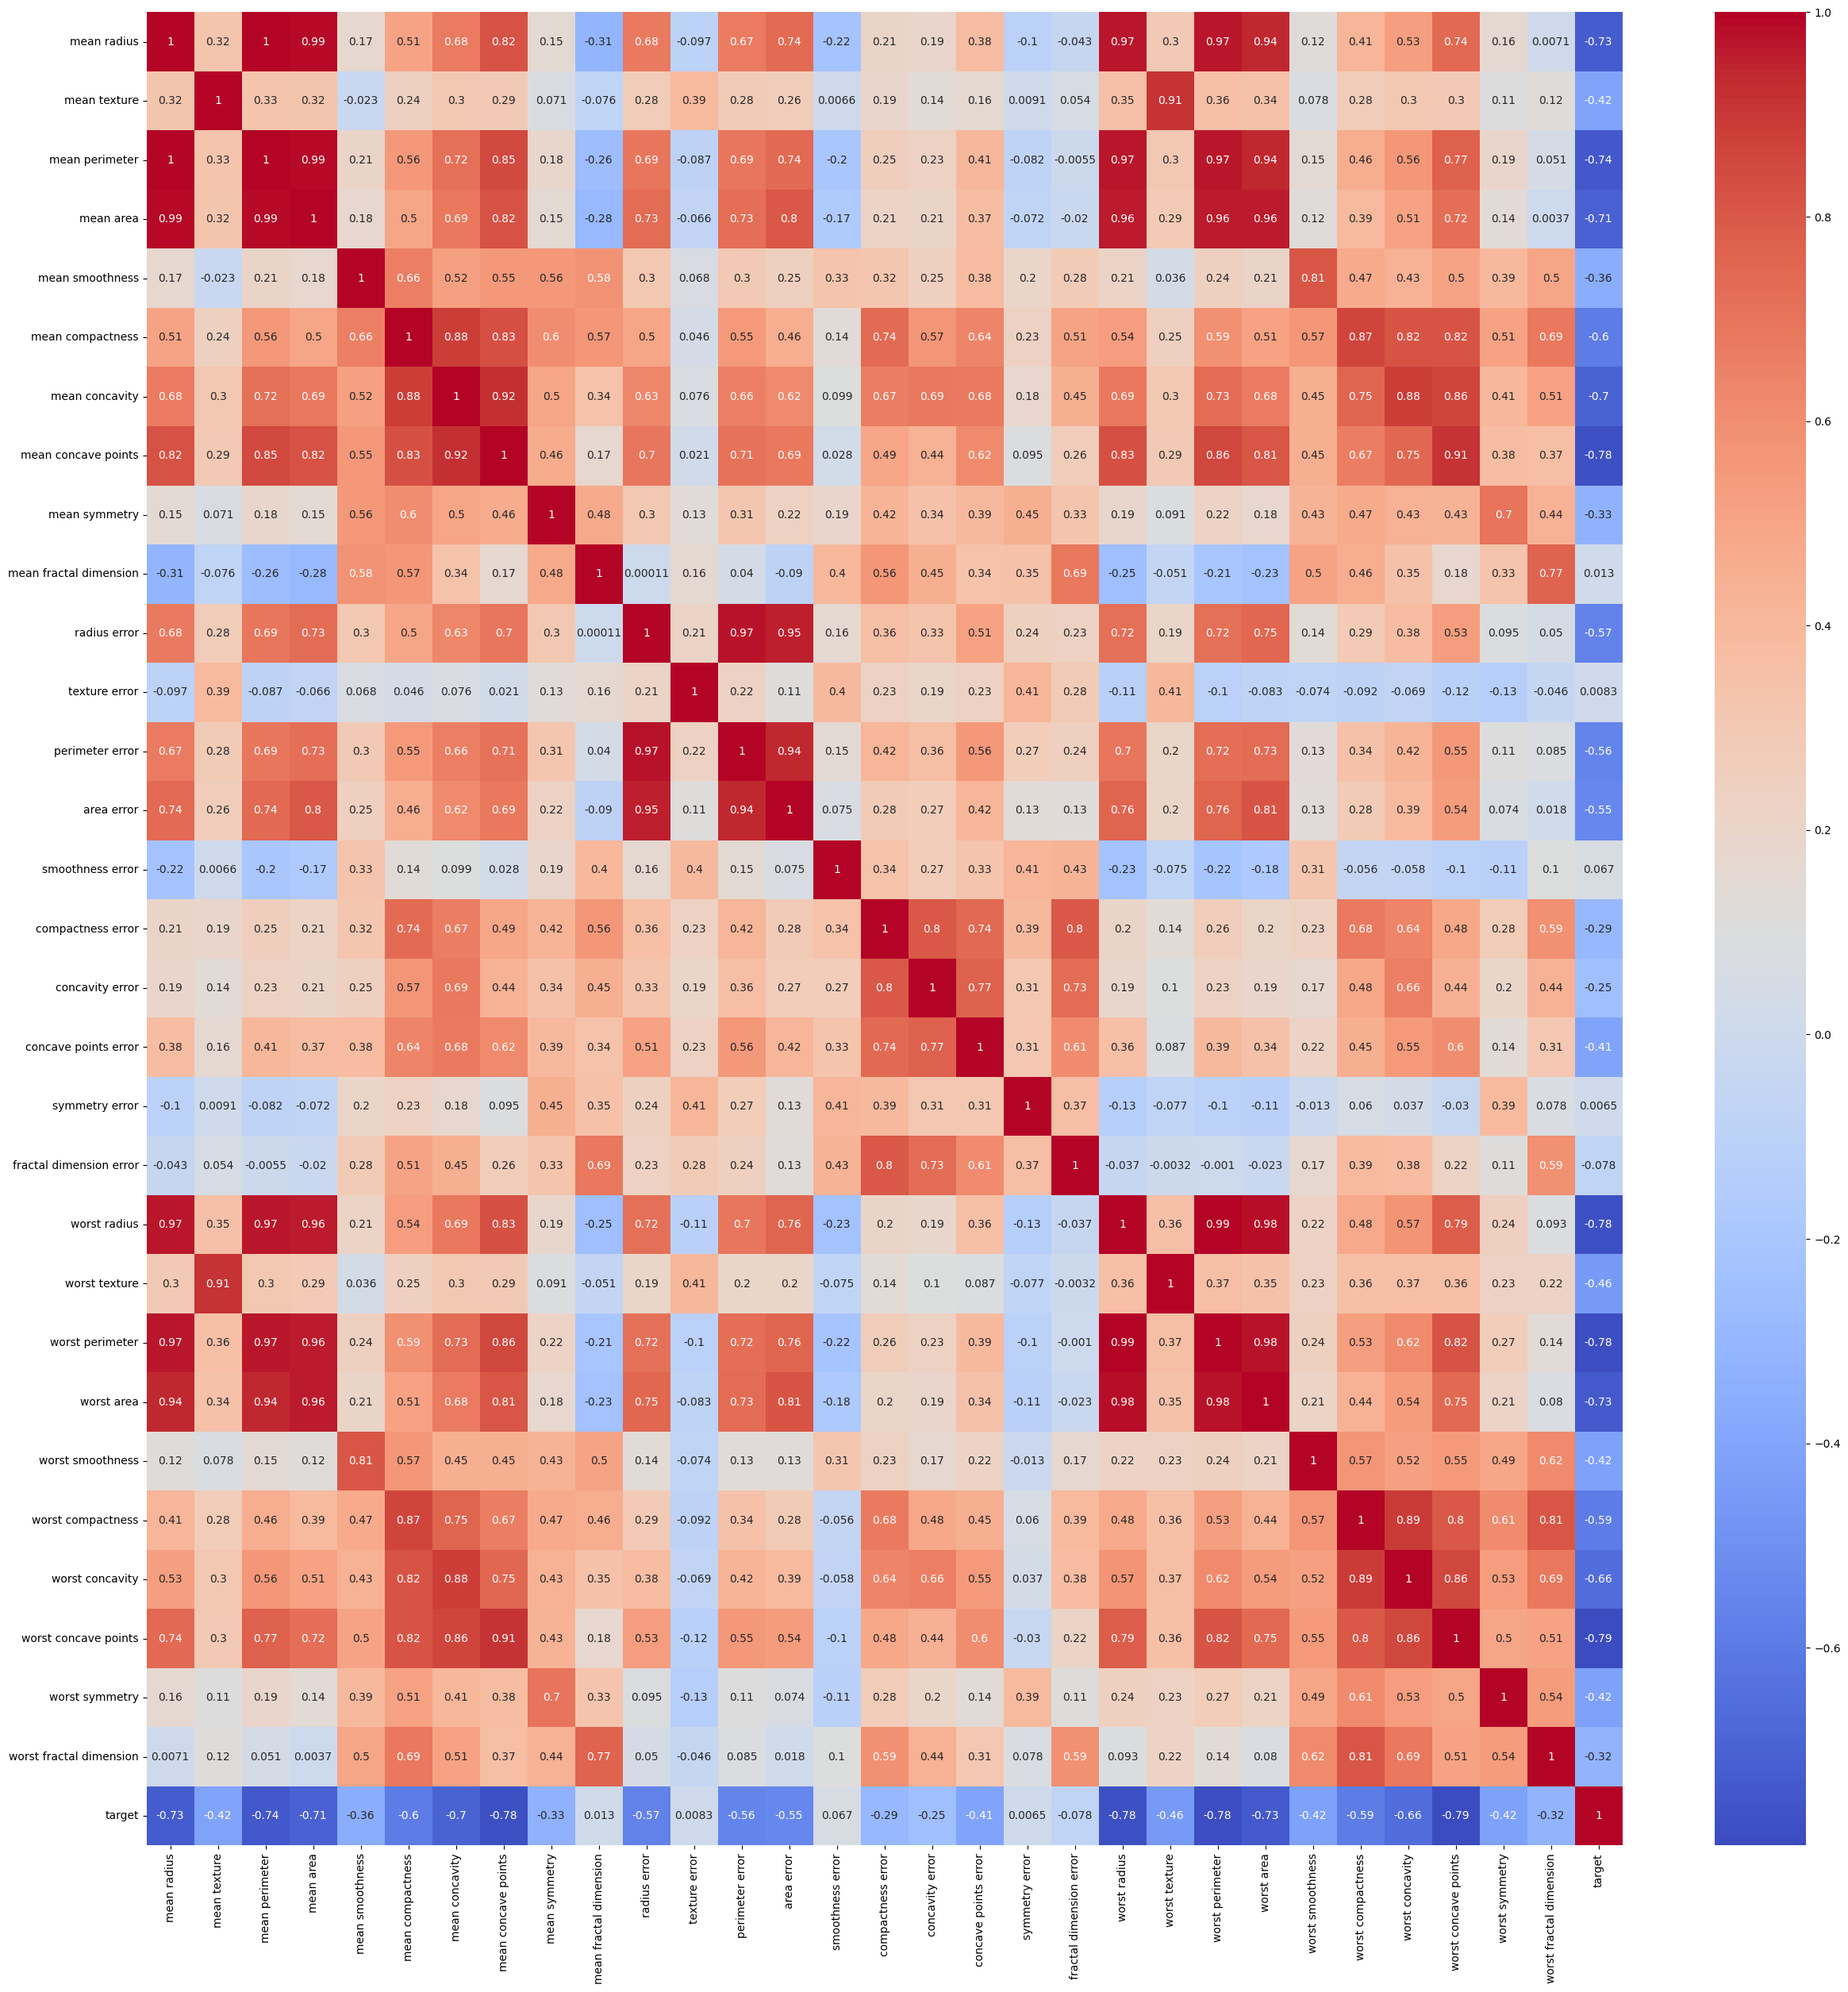

In [11]:
#Heatmap of correlation between features: 
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

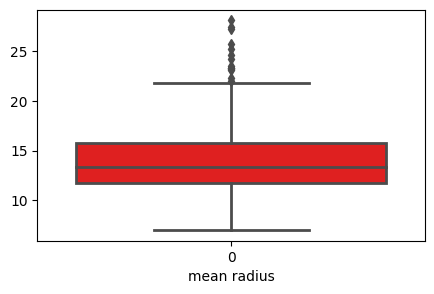

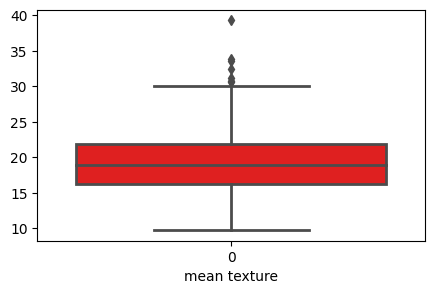

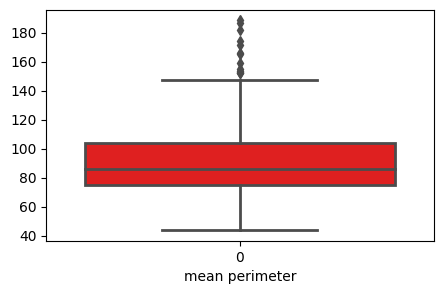

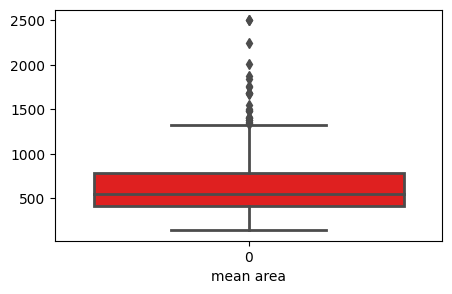

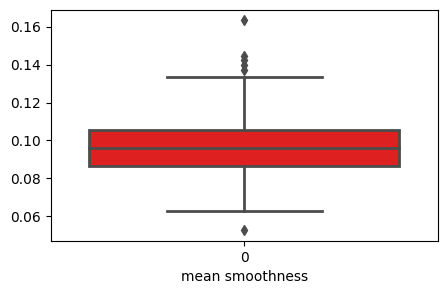

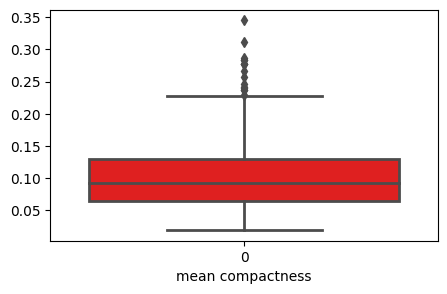

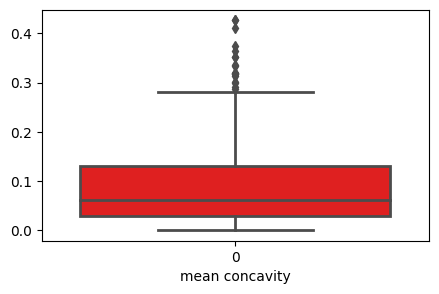

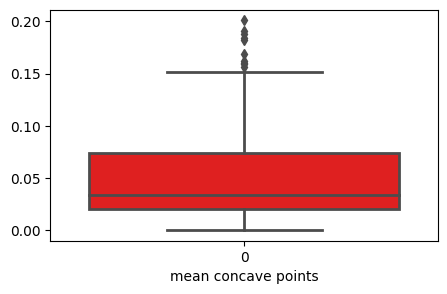

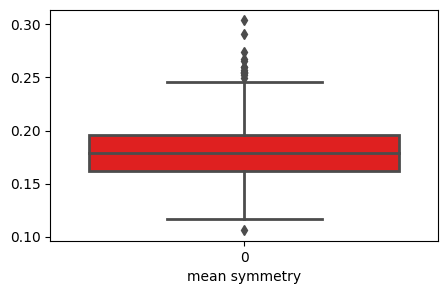

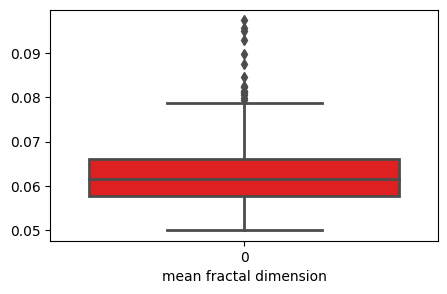

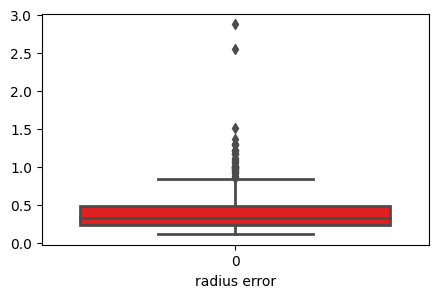

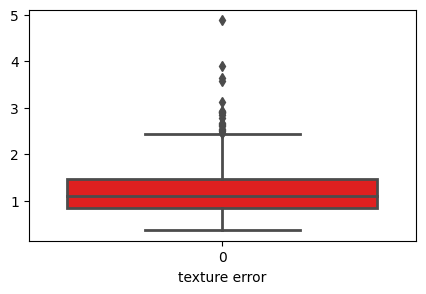

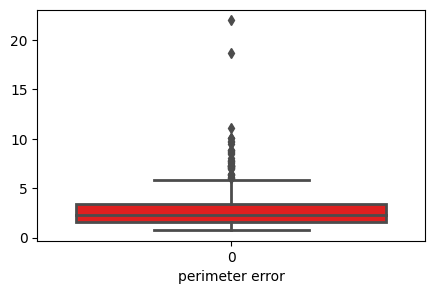

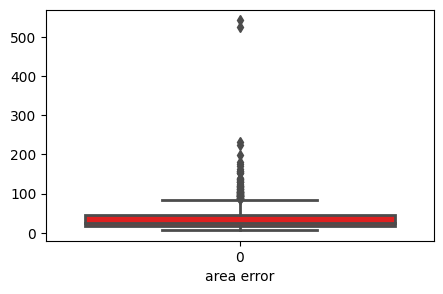

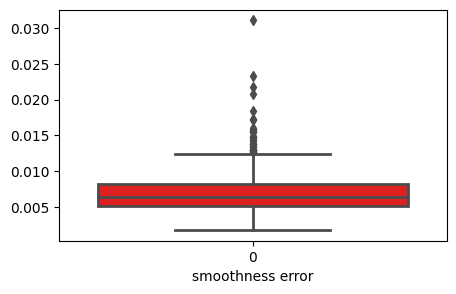

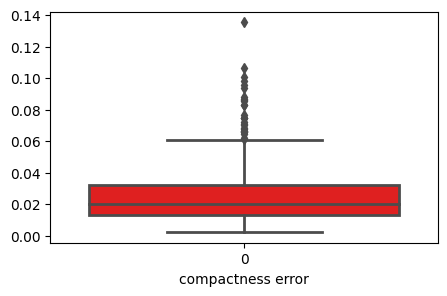

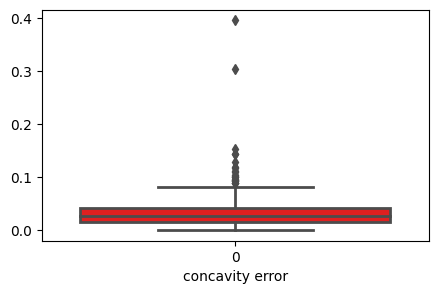

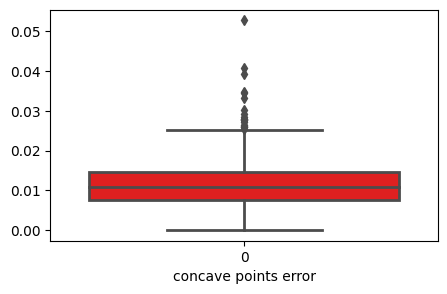

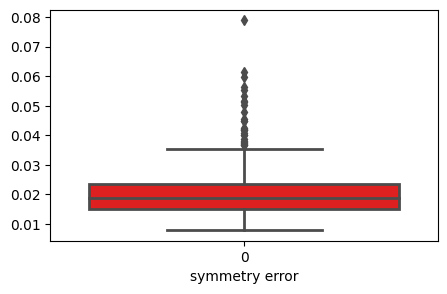

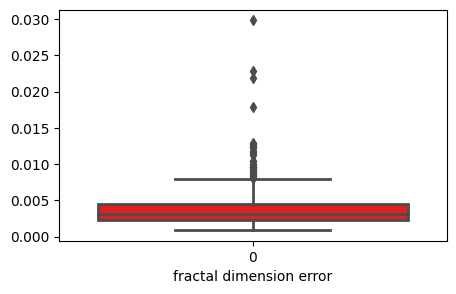

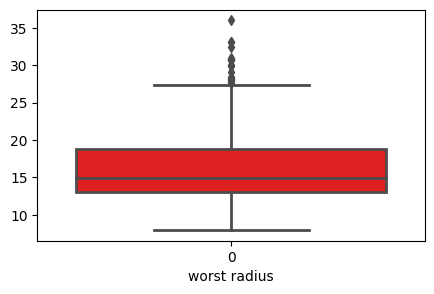

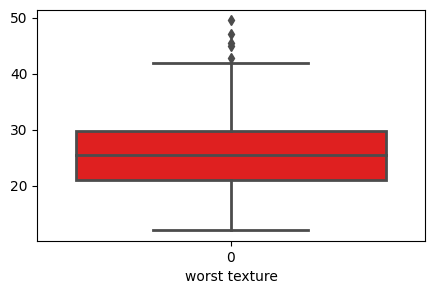

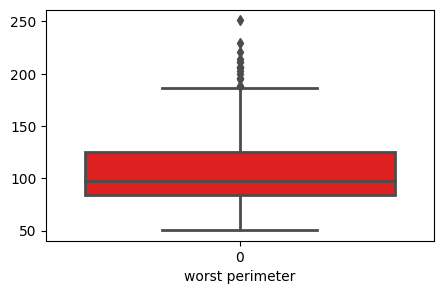

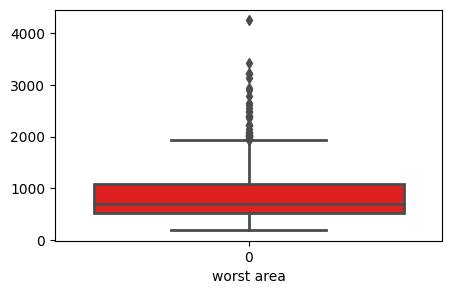

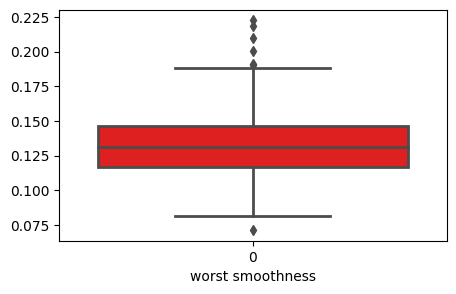

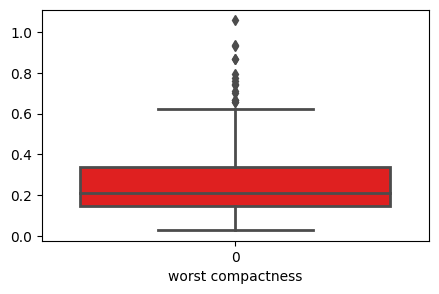

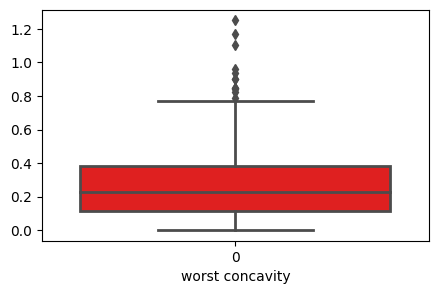

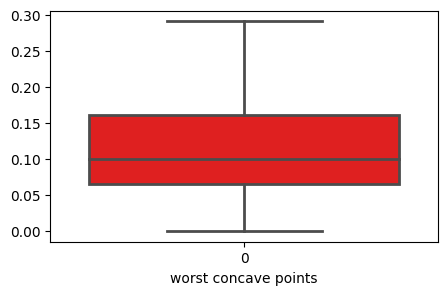

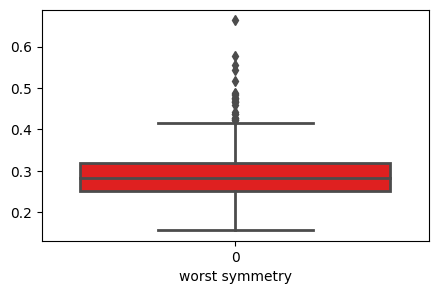

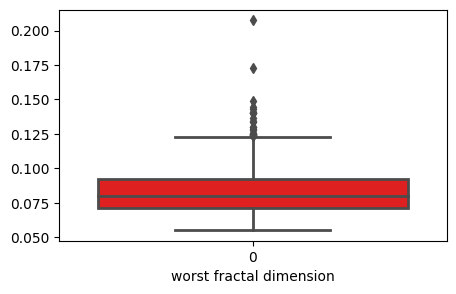

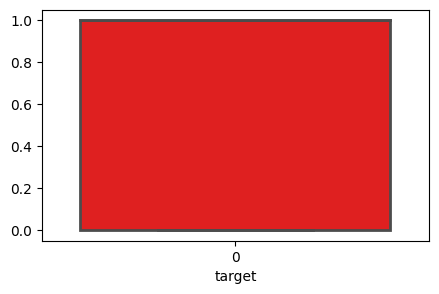

In [12]:
 # box plot to detect outlier in dataset
for i in df.columns:
    plt.figure(figsize=(5,3))
    sns.boxplot(data=df[i],color='r',linewidth=2)
    plt.xlabel(str(i))
    plt.show()

In [13]:
#outlier treatment
def outlier_treat(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lc_iqr = q1 - 1.5 * iqr
    uc_iqr = q3 + 1.5 * iqr
    x = x.clip(lower = lc_iqr, upper= uc_iqr )
    return x
df = df.apply(outlier_treat)

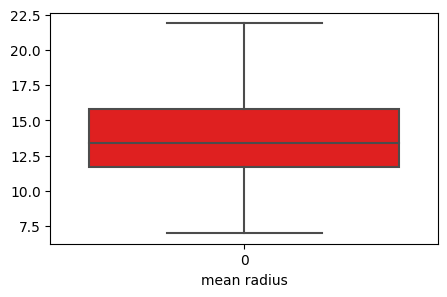

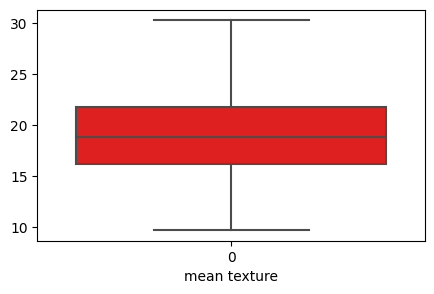

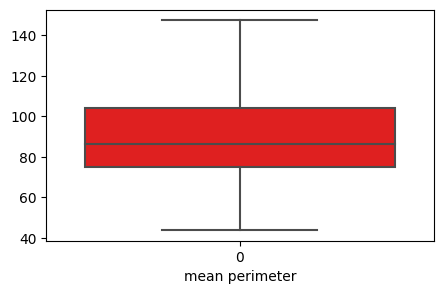

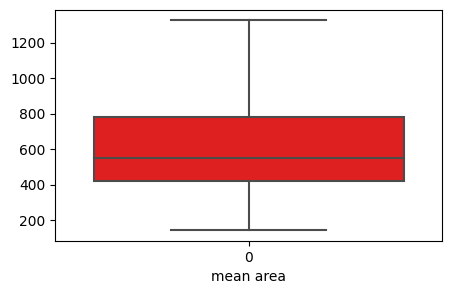

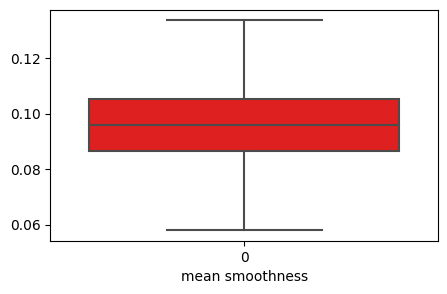

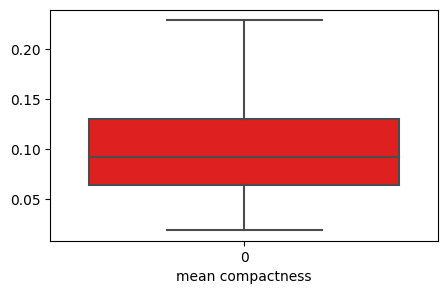

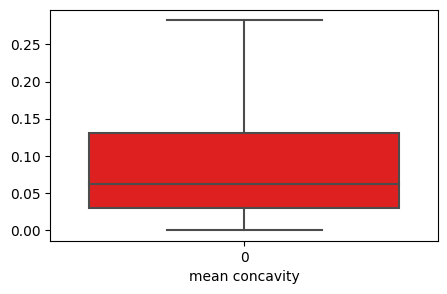

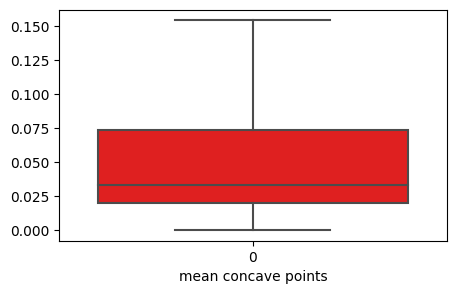

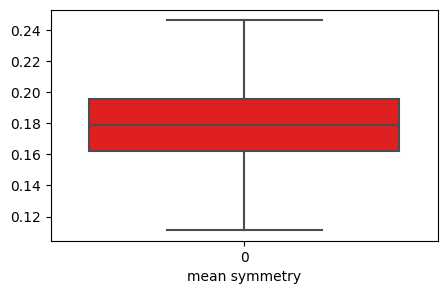

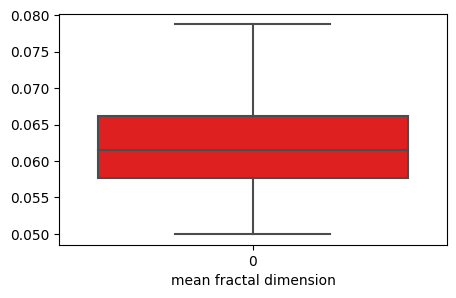

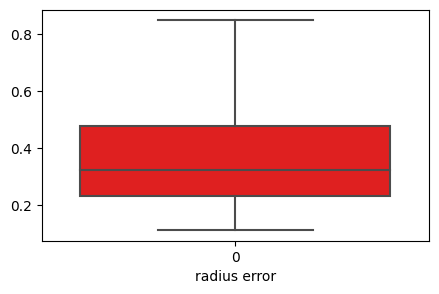

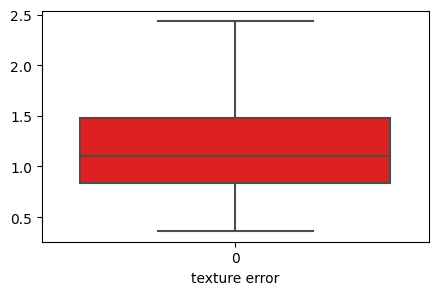

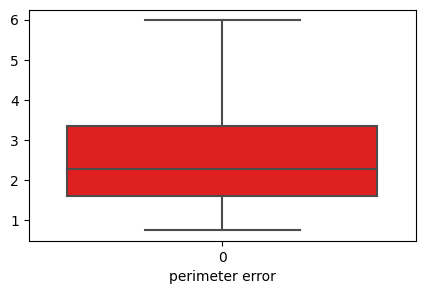

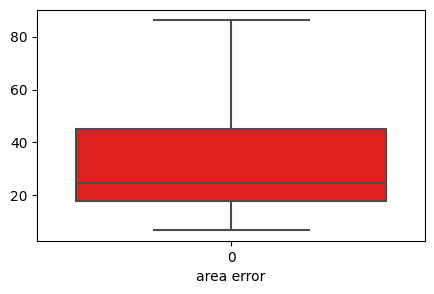

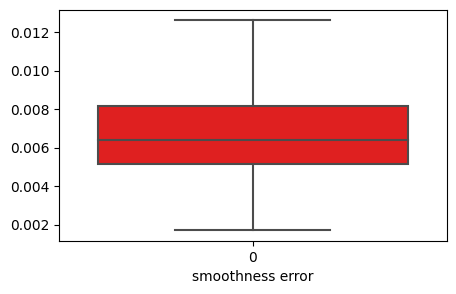

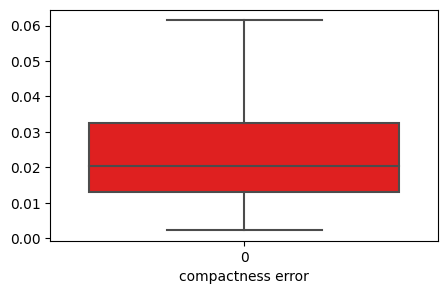

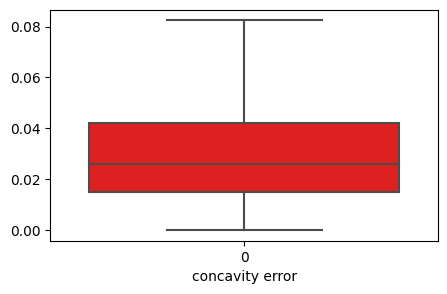

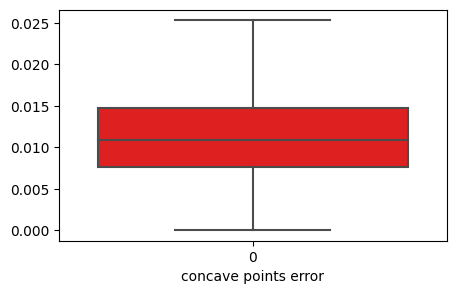

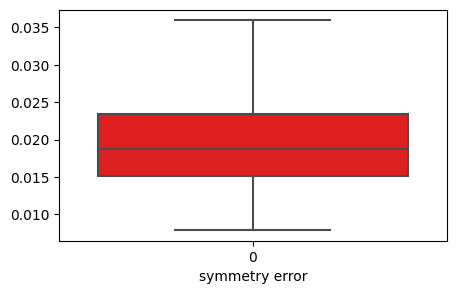

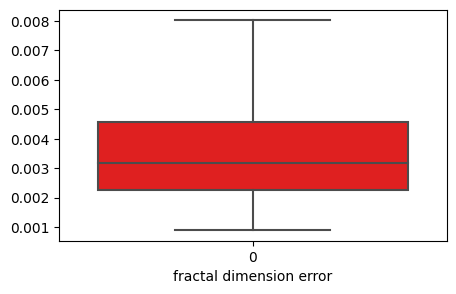

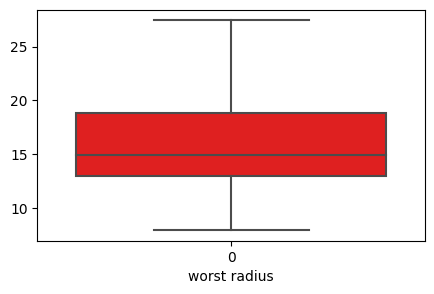

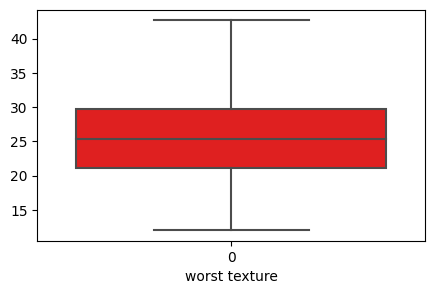

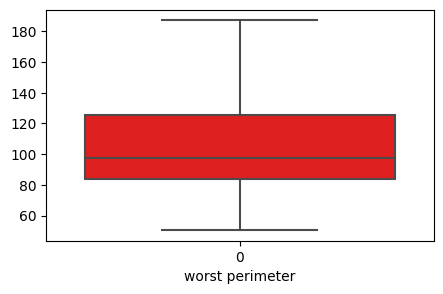

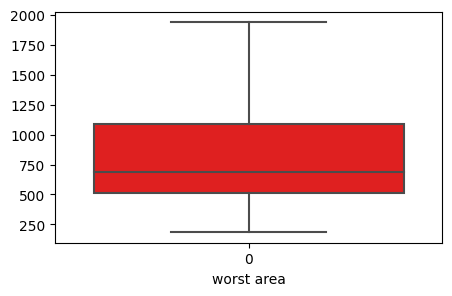

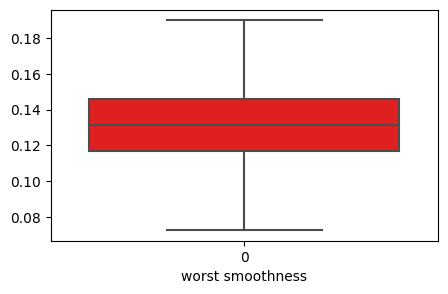

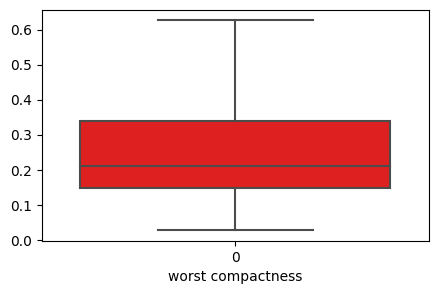

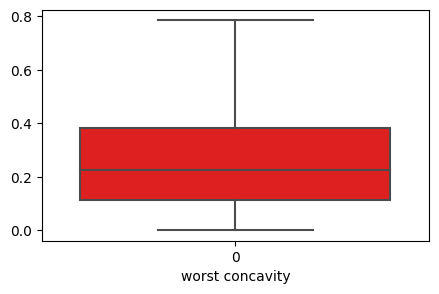

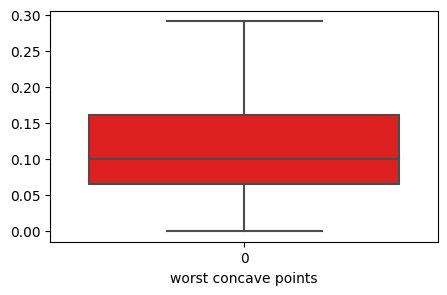

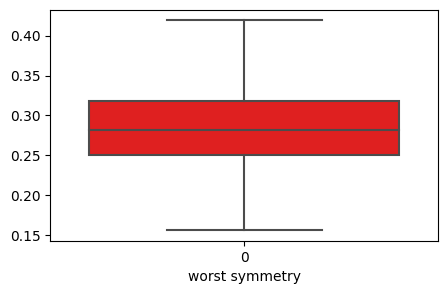

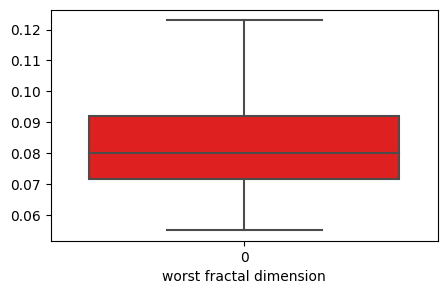

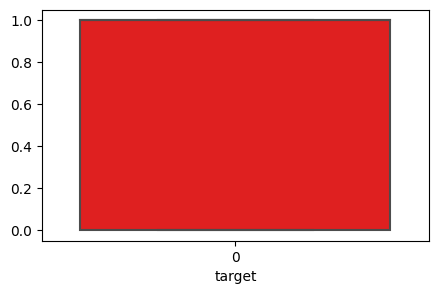

In [14]:
# box plot to detect outlier in dataset
for i in df.columns:
    plt.figure(figsize=(5,3))
    sns.boxplot(data=df[i],color='r')
    plt.xlabel(str(i))
    plt.show()

#### **Split data into X (features) and y (target)**

In [15]:
X = df.drop(columns=['target'])
y = df.target

In [16]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,0.2419,0.07871,0.84865,0.9053,5.9835,86.20,0.006399,0.049040,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,1937.05,0.1622,0.62695,0.7119,0.2654,0.41915,0.11890
1,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,0.1812,0.05667,0.54350,0.7339,3.3980,74.08,0.005225,0.013080,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1937.05,0.1238,0.18660,0.2416,0.1860,0.27500,0.08902
2,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,0.2069,0.05999,0.74560,0.7869,4.5850,86.20,0.006150,0.040060,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.00,0.1444,0.42450,0.4504,0.2430,0.36130,0.08758
3,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,0.2464,0.07875,0.49560,1.1560,3.4450,27.23,0.009110,0.061505,0.05661,0.01867,0.03596,0.008023,14.91,26.50,98.87,567.70,0.1901,0.62695,0.6869,0.2575,0.41915,0.12301
4,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,0.1809,0.05883,0.75720,0.7813,5.4380,86.20,0.011490,0.024610,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.00,0.1374,0.20500,0.4000,0.1625,0.23640,0.07678


In [17]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

#### **Feature Selection:**

In [18]:
# corr value wrt target variable
corr_values = X.corrwith(y)
corr_values

mean radius               -0.745217
mean texture              -0.419123
mean perimeter            -0.759006
mean area                 -0.752786
mean smoothness           -0.366931
mean compactness          -0.608494
mean concavity            -0.727168
mean concave points       -0.788099
mean symmetry             -0.334536
mean fractal dimension     0.006801
radius error              -0.642399
texture error              0.000152
perimeter error           -0.646875
area error                -0.739068
smoothness error           0.077796
compactness error         -0.331837
concavity error           -0.398120
concave points error      -0.450133
symmetry error             0.069606
fractal dimension error   -0.154061
worst radius              -0.793938
worst texture             -0.457663
worst perimeter           -0.800618
worst area                -0.794640
worst smoothness          -0.423390
worst compactness         -0.611083
worst concavity           -0.683565
worst concave points      -0

In [19]:
corr_values.to_csv('correlationvalue.csv')

In [20]:
var_method_1 =[
'worst perimeter',
'worst area',
'worst radius',
'worst concave points',
'mean concave points',
'mean perimeter',
'mean area',
'mean radius',
'area error',
'mean concavity',
'worst concavity',
'perimeter error',
'radius error',
'worst compactness',
'mean compactness',
'worst texture',
'concave points error',
'worst smoothness',
'mean texture',
'worst symmetry'
]


In [21]:
var_method_1

['worst perimeter',
 'worst area',
 'worst radius',
 'worst concave points',
 'mean concave points',
 'mean perimeter',
 'mean area',
 'mean radius',
 'area error',
 'mean concavity',
 'worst concavity',
 'perimeter error',
 'radius error',
 'worst compactness',
 'mean compactness',
 'worst texture',
 'concave points error',
 'worst smoothness',
 'mean texture',
 'worst symmetry']

In [22]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [23]:
#create the RFE model and select 9 attributes
rfe = RFE(RandomForestClassifier(), n_features_to_select=20)
rfe = rfe.fit(X, y)

In [24]:
vars_method2 = X.columns[rfe.get_support()].values

In [25]:
vars_method2

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean concavity', 'mean concave points',
       'radius error', 'perimeter error', 'area error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry',
       'worst fractal dimension'], dtype=object)

In [26]:
# Feature Selection based on importance
from sklearn.feature_selection import chi2
F_values, p_values  = chi2(X, y )

In [27]:
f_reg = pd.concat([pd.Series(X.columns), pd.Series(F_values), pd.Series(p_values)], axis=1)

In [28]:
f_reg.columns = ['var', 'f_val', 'p_val']

In [29]:
vars_method3 = f_reg.sort_values(by='f_val', ascending=False).head(15)['var'].values

In [30]:
vars_method3

array(['worst area', 'mean area', 'area error', 'worst perimeter',
       'mean perimeter', 'worst radius', 'mean radius', 'perimeter error',
       'worst texture', 'mean texture', 'worst concavity', 'radius error',
       'mean concavity', 'worst compactness', 'worst concave points'],
      dtype=object)

In [31]:
s1 = set(var_method_1)
s2 = set(vars_method2)
s3 = set(vars_method3)

In [32]:
final_list = list(s1.union(s2).union(s3))

In [33]:
print("Length of final list:",len(final_list))
final_list

Length of final list: 22


['mean radius',
 'worst concavity',
 'mean concavity',
 'worst area',
 'mean area',
 'mean texture',
 'worst fractal dimension',
 'area error',
 'worst texture',
 'mean perimeter',
 'worst symmetry',
 'worst radius',
 'worst perimeter',
 'mean smoothness',
 'worst compactness',
 'concave points error',
 'mean compactness',
 'mean concave points',
 'worst smoothness',
 'perimeter error',
 'radius error',
 'worst concave points']

In [34]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
list(final_list)

['mean radius',
 'worst concavity',
 'mean concavity',
 'worst area',
 'mean area',
 'mean texture',
 'worst fractal dimension',
 'area error',
 'worst texture',
 'mean perimeter',
 'worst symmetry',
 'worst radius',
 'worst perimeter',
 'mean smoothness',
 'worst compactness',
 'concave points error',
 'mean compactness',
 'mean concave points',
 'worst smoothness',
 'perimeter error',
 'radius error',
 'worst concave points']

In [36]:
vif_vals = pd.Series([variance_inflation_factor(df[list(final_list)].values, i) for i in range(0, len(final_list))])

In [37]:
vif_final = pd.concat([pd.Series(list(final_list)), vif_vals], axis=1)

In [38]:
vif_final.columns = ['var', 'vif']

In [39]:
X_final = X[vif_final.sort_values(by = 'vif', ascending=False)['var'].values]

In [40]:
X_final.shape

(569, 22)

#### **Split the data into training and testing sets**

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_final,y, test_size=0.25, random_state=42)

In [42]:
y_train.value_counts()

1    268
0    158
Name: target, dtype: int64

In [43]:
y_test.value_counts()

1    89
0    54
Name: target, dtype: int64

#### **Create a pipeline that includes preprocessing and a supervised learning algorithm**

In [44]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC())
])

#### **Define the hyperparameters to tune**

In [45]:
params = {
    'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'clf__C': [0.1, 1, 10, 100],
    'clf__gamma': ['scale', 'auto']
}

#### **Use GridSearchCV to find the best hyperparameters**

In [46]:
grid = GridSearchCV(pipe, param_grid=params, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', SVC())]),
             param_grid={'clf__C': [0.1, 1, 10, 100],
                         'clf__gamma': ['scale', 'auto'],
                         'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

#### **Print the best hyperparameters and the score of the best model**

In [47]:
print("Best hyperparameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)

Best hyperparameters:  {'clf__C': 0.1, 'clf__gamma': 'scale', 'clf__kernel': 'linear'}
Best score:  0.9741450068399453


#### **Use the best model to predict the labels of the test data**

In [48]:
y_pred = grid.predict(X_test)

In [49]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1])

In [50]:
Data = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
Data.head()

,Real Values,Predicted Values
204,1,1
70,0,0
131,0,0
431,1,1
540,1,1


#### **Visualize the actual and predicted values**

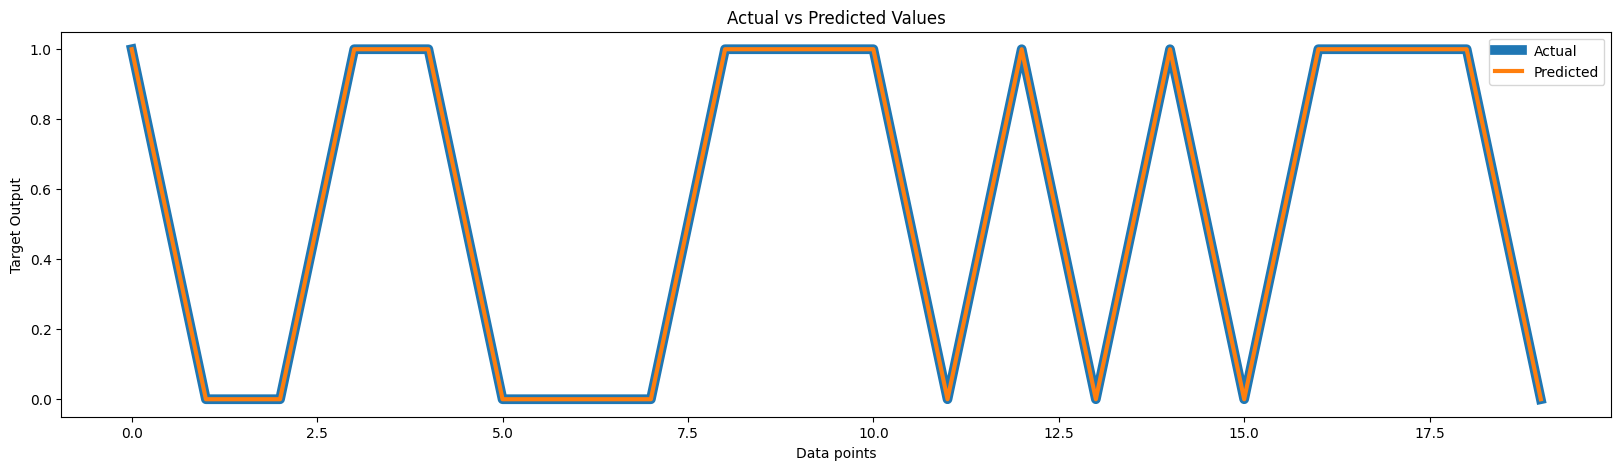

In [51]:
plt.figure(figsize=(20,5))
plt.plot(y_test[:20].values, label="Actual",linewidth=7)
plt.plot(y_pred[:20], label="Predicted",linewidth=3)
plt.xlabel("Data points")
plt.ylabel("Target Output")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()

#### **Evaluate the model performance on the test data**

In [52]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        54
           1       0.98      1.00      0.99        89

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.99       143
weighted avg       0.99      0.99      0.99       143



In [53]:
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.986013986013986


#### **Create an instance of the Classification algorithms**

In [54]:
preprocessing_pipeline = make_pipeline(StandardScaler())

# Create an instance of the regression algorithm
models = {'LogisticRegression' :  LogisticRegression(),
          'RandomForestClassifier' :  RandomForestClassifier(),
          'SVC' :  SVC(),
          'GaussianNB' :  GaussianNB(),
          'DecisionTreeClassifier' :  DecisionTreeClassifier()}
reg_results = {}
reg_predict = {}

In [55]:
for model_name, model in models.items():
# Combine the preprocessing pipeline and the regression algorithm
    pipeline = Pipeline(steps=[("preprocessor", preprocessing_pipeline), 
                                     ("model", model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(f"Scoring {model_name}...")
    reg_predict[model_name] = y_pred
    reg_results[model_name] = accuracy_score(y_test, y_pred)

Scoring LogisticRegression...
Scoring RandomForestClassifier...
Scoring SVC...
Scoring GaussianNB...
Scoring DecisionTreeClassifier...


In [56]:
reg_results

{'LogisticRegression': 0.993006993006993,
 'RandomForestClassifier': 0.972027972027972,
 'SVC': 0.972027972027972,
 'GaussianNB': 0.958041958041958,
 'DecisionTreeClassifier': 0.9440559440559441}

In [57]:
reg_predict

{'LogisticRegression': array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
        0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1]),
 'RandomForestClassifier': array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
        0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
        1, 1, 1, 0, 1

In [58]:
y_test = np.array(y_test)

In [59]:
reg_predict = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in reg_predict.items() ]))
abc = pd.DataFrame({'Real Values':y_test})
final = abc.join(reg_predict)

In [60]:
final.head()

,Real Values,LogisticRegression,RandomForestClassifier,SVC,GaussianNB,DecisionTreeClassifier
0,1,1,1,1,1,1
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,1,1,1,1,1,1
4,1,1,1,1,1,1


#### **Visualize the actual and predicted values**

<Figure size 1000x500 with 0 Axes>

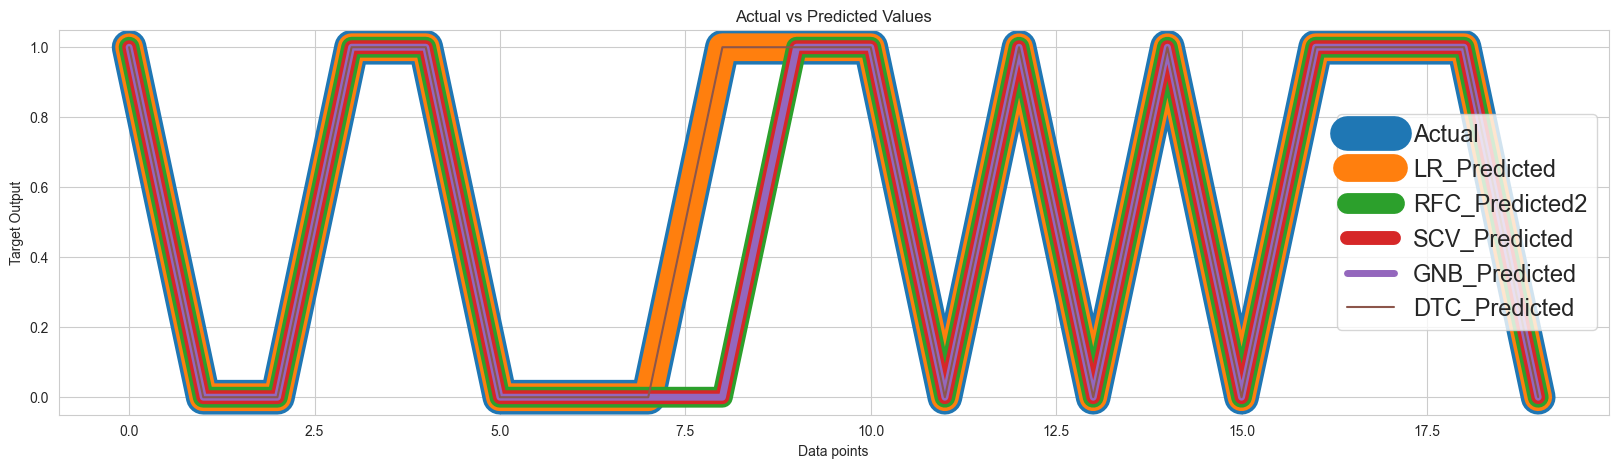

In [61]:
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.figure(figsize=(20,5))
final_cut = final[:20]
plt.plot(final_cut['Real Values'], label="Actual", linewidth=25)
plt.plot(final_cut['LogisticRegression'], label="LR_Predicted",linewidth=20)
plt.plot(final_cut['RandomForestClassifier'], label="RFC_Predicted2",linewidth=15)
plt.plot(final_cut['SVC'], label="SCV_Predicted",linewidth=10)
plt.plot(final_cut['GaussianNB'], label="GNB_Predicted",linewidth=5)
plt.plot(final_cut['DecisionTreeClassifier'], label="DTC_Predicted")
plt.xlabel("Data points")
plt.ylabel("Target Output")
plt.title("Actual vs Predicted Values")
plt.legend(fontsize = 17)
plt.show()

In [62]:
reg_results = pd.DataFrame({'Model_Name':reg_results.keys(), 'reg_result': reg_results.values()})
reg_results

,Model_Name,reg_result
0,LogisticRegression,0.993007
1,RandomForestClassifier,0.972028
2,SVC,0.972028
3,GaussianNB,0.958042
4,DecisionTreeClassifier,0.944056
